In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("../data/train.csv")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def plot_numerical_data_without_biases_in_sampling(data,x,y,binwidth=10):

    index = []
    target = []
    percentage = []
    
    min_value = train_df[x].min()
    max_value = train_df[x].max()
    
    for value in range(min_value,max_value+1,binwidth):
        
        temp_data = data[(data[x]<(value+binwidth)) & (data[x]>=value)]
        crosstab_data = pd.crosstab(index = temp_data[x], columns = temp_data[y])
        
        sums = crosstab_data.sum()
        no,yes = sums.values/sum(sums)*100
    
        index.append(f"{value}-{value+binwidth}")
        index.append(f"{value}-{value+binwidth}")
        
        target.append("no")
        target.append("yes")
        
        percentage.append(no)
        percentage.append(yes)


    without_bias_data = pd.DataFrame(data={"percentage":percentage,f"{y}":target},index=index)

    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    sns.histplot(x=f"{x}",data=data,binwidth=binwidth,hue=f"{y}")
    plt.title("with biases")
    
    
    plt.subplot(1,2,2)
    sns.barplot(data = without_bias_data,x = without_bias_data.index ,y="percentage",hue=f"{y}")
    plt.xlabel(x)
    plt.title("without biases")

    


In [29]:
def plot_categorical_data_without_biases_in_sampling(data,x,y):
    index = []
    target = []
    percentage = []

    for value in data[x].unique():
        
        temp_data = data[data[x]==value]
        crosstab_data = pd.crosstab(index = temp_data[x], columns = temp_data[y])
        
        sums = crosstab_data.sum()
        no,yes = sums.values/sum(sums)*100
    
        index.append(f"{value}")
        index.append(f"{value}")
        
        target.append("no")
        target.append("yes")
        
        percentage.append(no)
        percentage.append(yes)

    data_without_biases = pd.DataFrame(data={"percentage":percentage,f"{y}":target},index=index)

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    sns.histplot(x=x,data=data,hue=f"{y}")
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    sns.barplot(data = data_without_biases,x = data_without_biases.index ,y="percentage",hue=f"{y}")
    plt.xlabel(x)
    plt.xticks(rotation=45)

         

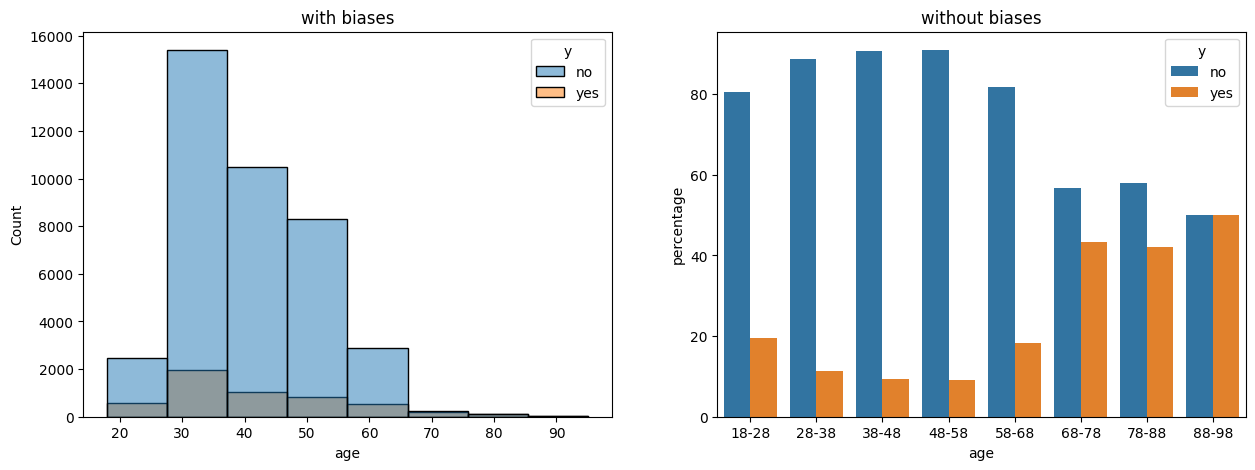

In [30]:
plot_numerical_data_without_biases_in_sampling(train_df,"age","y",10)

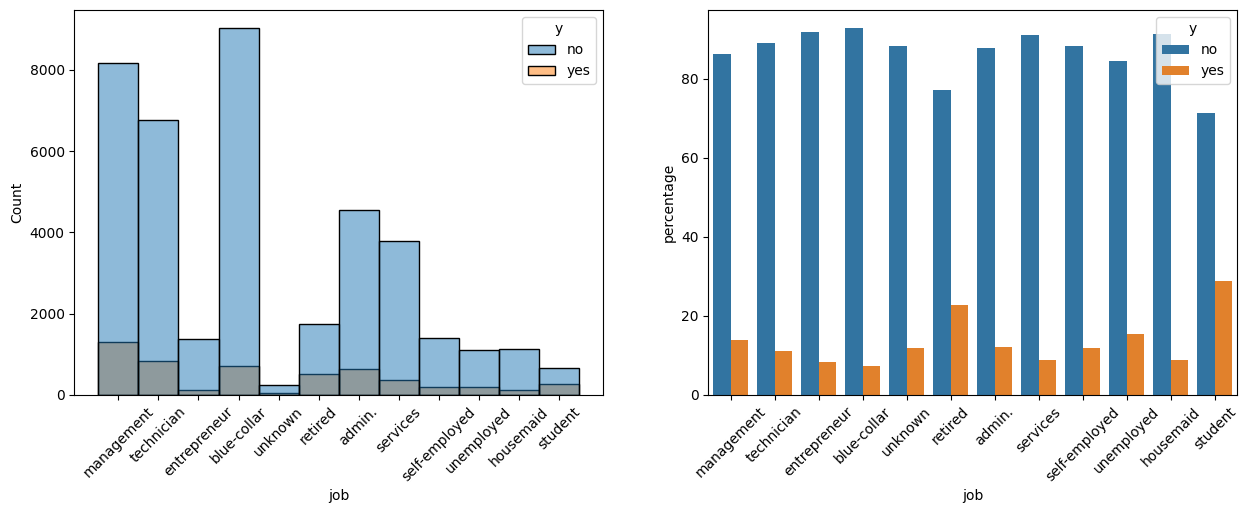

In [31]:
plot_categorical_data_without_biases_in_sampling(train_df,"job","y")